In [2]:
def WakeUpWord() : 
    ########## 패키지 임포트 ##########
    import os, pathlib, librosa, shutil, time
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    import tensorflow as tf
    import soundfile as sf
    from numpy import random
    from tensorflow.keras import layers
    from tensorflow.keras import models
    from IPython import display
    ########## 패키지 임포트 ##########
    
    ########## 함수 선언 ##########
    # noise를 추가하여 데이터를 늘리는 함수 입니다.
    def adding_white_noise(data, noise_rate=0.005) :
        wn = np.random.randn(len(data))
        data_wn = data + noise_rate*wn
        return data_wn
    
    # 순서를 뒤죽 박죽으로 섞어 데이터를 늘리는 함수 입니다. (ex: [1, 2, 3, 4] → [4, 1, 2, 3])
    def shifting_sound(data, roll_rate=0.1):
        data_rolled = np.roll(data, int(len(data) * roll_rate))
        return data_rolled
    
    # 음성을 늘어뜨려 데이터를 늘리는 함수 입니다.
    def stretch_sound(data, rate=0.8):
        data_stretched = librosa.effects.time_stretch(data, rate)
        return data_stretched
    
    # 오디오를 거꾸로 재생하여 데이터를 늘리는 함수 입니다.
    def reverse_sound(data):
        data_len = len(data)
        data_reversed = np.array([data[len(data)-1-i] for i in range(len(data))])
        return data_reversed
    
    # 위상을 뒤집어 데이터를 늘리는 함수 입니다.
    def flip_sound(data):
        data_fliped = (-1) * data
        return data_fliped
    ########## 함수 선언 ##########
    
    # 실험 재현성의 시드 값을 설정합니다.
    seed = 42
    tf.random.set_seed(seed)
    np.random.seed(seed)
    
    # 데이터가 저장된 폴더 경로를 지정합니다.
    data_dir = pathlib.Path('data/mini_speech_commands')
    
    # 미니 음성 명령 데이터 세트를 가져옵니다.
    if not data_dir.exists() :
        tf.keras.utils.get_file(
            'mini_speech_commands.zip',
            origin="http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip",
            extract=True,
            cache_dir='.',
            cache_subdir='data')
    
    # 데이터를 증강합니다. (sample rate 44100 Hz 기준)
    wuw_audio_path = '입력단/Wake_up_Word/data/'
    wuw_audio_list = sorted(os.listdir(wuw_audio_path))

    audio_shape = []

    for i in range(len(wuw_audio_list)) :
        wuw_audio, sr = librosa.load(wuw_audio_path + wuw_audio_list[i], sr= 16000)
        # print(sr)
        # display.display(display.Audio(wuw_audio_path + wuw_audio_list[i], rate=16000))
        # display.display(display.Audio(wuw_audio_path + wuw_audio_list[i], rate=22050))
        # def adding_white_noise(data, noise_rate=0.005):
        # def shifting_sound(data, roll_rate=0.1):
        # def stretch_sound(data, rate=0.8):
        # def reverse_sound(data):
        # def flip_sound(data):
        data = wuw_audio
        # data = adding_white_noise(wuw_audio)
        # data = reverse_sound(wuw_audio)
        # data = flip_sound(wuw_audio)
        plt.plot(data)

        # display.display(display.Audio(data, rate=16000))

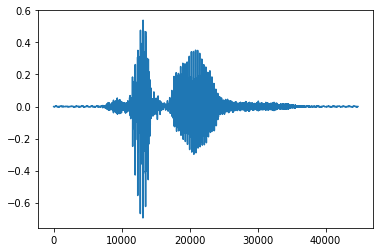

In [ ]:
wuw_audio_path = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/dataset/WUW dataset/'
wuw_audio_list = sorted(os.listdir(wuw_audio_path)) # sample rate 44100 Hz 기준
wuw_audio, sr = librosa.load(wuw_audio_path + wuw_audio_list[5], sr= 44100)
data = wuw_audio
plt.plot(data)

# temp_data = adding_white_noise(wuw_audio)
# temp_data = shifting_sound(wuw_audio)
# temp_data = stretch_sound(wuw_audio, rate= 1.4)
# temp_data = reverse_sound(wuw_audio)
# temp_data = flip_sound(wuw_audio)

# plt.plot(temp_data, alpha= 0.5)

display.display(display.Audio(data, rate=16000), )

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [5]:
wuw_audio_path = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/dataset/WUW dataset/'
wuw_audio_list = sorted(os.listdir(wuw_audio_path))

audio_shape = []

for i in range(len(wuw_audio_list)):
    wuw_audio, sr = librosa.load(wuw_audio_path + wuw_audio_list[i], sr= 16000)
    audio_shape.append(wuw_audio.shape[0])

print(max(audio_shape))

source_list = []
for i in range(len(wuw_audio_list)):
    wuw_audio, _ = librosa.load(wuw_audio_path + wuw_audio_list[i], sr= 16000)
    np_array = np.zeros((max(audio_shape) - wuw_audio.shape[0]))
    np_array = np.hstack((np_array, wuw_audio))

    source_list.append(np_array)

16240


In [6]:
display.display(display.Audio(source_list[5], rate=16000))
display.display(display.Audio(source_list[5], rate=22050))

In [ ]:
audios = []
for i in range(len(wuw_audio_list)):
    wuw_audio, _ = librosa.load(wuw_audio_path + wuw_audio_list[i], sr= 16000)
    np_array = np.zeros((max(audio_shape) - wuw_audio.shape[0]))
    np_array = np.hstack((np_array, wuw_audio))
    
    

    audios.append(np_array)

In [ ]:
examples.extend(audios)
print(len(examples))

1020


# Data Augmentation

In [ ]:
# def adding_white_noise(data, noise_rate=0.005):
# def shifting_sound(data, roll_rate=0.1):
# def stretch_sound(data, rate=0.8):
# def reverse_sound(data): ############################### 의미 없을듯
# def flip_sound(data):

In [ ]:
reverse_sound
repeat = 84
examples = []
for j in range(repeat):
    for i in range(len(wuw_audio_list)):
        wuw_audio, _ = librosa.load(wuw_audio_path + wuw_audio_list[i], sr= 44100)
        # np_array = np.zeros((max(audio_shape) - wuw_audio.shape[0]))
        # np_array = np.hstack((np_array, wuw_audio))
        
        wn = np.random.randn(len(np_array))
        data = np_array + 0.0005 * wn

        reverse_sound(wuw_audio_path + wuw_audio_list[i])
        examples.append(data)

In [ ]:

# source_list -> data augmentation

aug_name = ['add', 'shift', 'stretch', 'reverse', 'flip']
num = 0

repeat = 84
examples = []
for j in range(repeat):
    for i in range(len(source_list)):
        if num == 0:
            data = adding_white_noise(source_list[i], noise_rate= random.randn() / 500)
        elif num == 1:
            data = shifting_sound(data, roll_rate= random.randn() / 25)
        elif num == 2:
            data = stretch_sound(data, rate=0.8)
        elif num == 3:
            data = reverse_sound(data)
        elif num == 4:
            data = flip_sound(data)
        examples.append(data)
save_path = '/content/data/mini_speech_commands/' + aug_name[num] + '/'
if not os.path.isdir(save_path):
    os.mkdir(save_path)
for i in range(len(examples)):
    sf.write(save_path + aug_name[num] + str(i) + '.wav', examples[i], 16000, format = 'WAV')

In [42]:
test_list = []
cnt = 0
num_max = 0.7
num_min = -0.1

for i in range(1000):
    test_list.append(random.randn() / 25)
for i in range(len(test_list)):
    if test_list[i] > num_max or  test_list[i] < num_min:
        print(test_list[i])
        cnt += 1
print(cnt)

0.10168820899342741
0.10727753673043082
-0.1221069685657909
0.11978683068501007
0.10267404439863936
-0.10971320023687997
0.11556007594950929
-0.11303263283014912
0.10686410161923948
-0.10029999571176998
-0.10024547817860265
0.10235317073792351
-0.10536850519320186
0.12613465460502793
0.10112689977281467
15


In [32]:
# 0.1
# 0.01000 ~ 0,00000
random.randn()

-1.168082994884352

In [ ]:
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")

In [ ]:
from numpy.core.fromnumeric import mean
rand_num = []
for i in range(1000000):
    rand_num.append(random.randint(-9, 10))
print(max(rand_num))
print(min(rand_num))
print(mean(rand_num))

9
-10
-0.492656


In [ ]:
save_path = '/content/data/mini_speech_commands/jarvis/'
if not os.path.isdir(save_path):
	os.mkdir(save_path)

for i in range(len(examples)):
    sf.write(save_path + 'jarvis_' + str(i) + '.wav', examples[i], 16000, format = 'WAV')

IndexError: ignored

In [ ]:
shutil.copytree("/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/dataset/WUW dataset", "/content/data/mini_speech_commands/jarvis")

'/content/data/mini_speech_commands/jarvis'

The dataset's audio clips are stored in eight folders corresponding to each speech command: `no`, `yes`, `down`, `go`, `left`, `up`, `right`, and `stop`:

In [ ]:
print(str(data_dir))

data/mini_speech_commands


In [ ]:
%cd /content

/content


In [ ]:
DATASET_PATH = '/content/data/mini_speech_commands/'
data_dir = pathlib.Path(DATASET_PATH)

commands = np.array(tf.io.gfile.listdir(str(data_dir)))
print(commands)
commands = commands[commands != 'README.md']
print('Commands:', commands)

['no' 'README.md' 'right' 'yes' 'stop' 'go' 'down' 'left' 'up']
Commands: ['no' 'right' 'yes' 'stop' 'go' 'down' 'left' 'up']


Extract the audio clips into a list called `filenames`, and shuffle it:

In [ ]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')

filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/commands[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 8000
Number of examples per label: 1000
Example file tensor: tf.Tensor(b'/content/data/mini_speech_commands/no/47d01978_nohash_1.wav', shape=(), dtype=string)


In [ ]:
print(type(filenames))
print(filenames)

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[b'/content/data/mini_speech_commands/no/47d01978_nohash_1.wav'
 b'/content/data/mini_speech_commands/up/e41e41f7_nohash_0.wav'
 b'/content/data/mini_speech_commands/yes/a4e8a997_nohash_0.wav' ...
 b'/content/data/mini_speech_commands/right/dedc7fab_nohash_1.wav'
 b'/content/data/mini_speech_commands/yes/b97c9f77_nohash_4.wav'
 b'/content/data/mini_speech_commands/go/2cf28b70_nohash_0.wav'], shape=(8000,), dtype=string)


Split `filenames` into training, validation and test sets using a 80:10:10 ratio, respectively:

In [ ]:

train_size = 0.8
train_ratio = int(len(filenames) * train_size)

train_files = filenames[:train_ratio]
val_files = filenames[train_ratio: train_ratio + int((1-train_size)/2 * len(filenames))]
test_files = filenames[int(train_ratio + (1-train_size)/2 * len(filenames)) : len(filenames) + 1]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 6409
Validation set size 801
Test set size 802


In [ ]:
test_file = tf.io.read_file(DATASET_PATH+'/down/0a9f9af7_nohash_0.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([13654, 1])

In [ ]:
def decode_audio(audio_binary):
  # Decode WAV-encoded audio files to `float32` tensors, normalized
  # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  # Since all the data is single channel (mono), drop the `channels`
  # axis from the array.
  return tf.squeeze(audio, axis=-1)

# 폴더에서, 마지막 파일의 이름을 레이블로

In [ ]:
def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph.
  return parts[-2]

In [ ]:
tfspr = tf.strings.split(
      input= '/content/data/mini_speech_commands/down/004ae714_nohash_0.wav',
      sep=os.path.sep)
tfspr

<tf.Tensor: shape=(6,), dtype=string, numpy=
array([b'', b'content', b'data', b'mini_speech_commands', b'down',
       b'004ae714_nohash_0.wav'], dtype=object)>

In [ ]:
tfspr[1]

<tf.Tensor: shape=(), dtype=string, numpy=b'content'>

In [ ]:
get_label('/content/data/mini_speech_commands/down/004ae714_nohash_0.wav')

<tf.Tensor: shape=(), dtype=string, numpy=b'down'>

Define another helper function—`get_waveform_and_label`—that puts it all together:

- The input is the WAV audio filename.
- The output is a tuple containing the audio and label tensors ready for supervised learning.

In [ ]:
def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [ ]:
get_waveform_and_label('/content/data/mini_speech_commands/down/004ae714_nohash_0.wav')

(<tf.Tensor: shape=(16000,), dtype=float32, numpy=
 array([-0.00396729, -0.00411987, -0.0039978 , ..., -0.00469971,
        -0.00579834, -0.00683594], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'down'>)

Build the training set to extract the audio-label pairs:

- Create a `tf.data.Dataset` with `Dataset.from_tensor_slices` and `Dataset.map`, using `get_waveform_and_label` defined earlier.

You'll build the validation and test sets using a similar procedure later on.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

Let's plot a few audio waveforms:

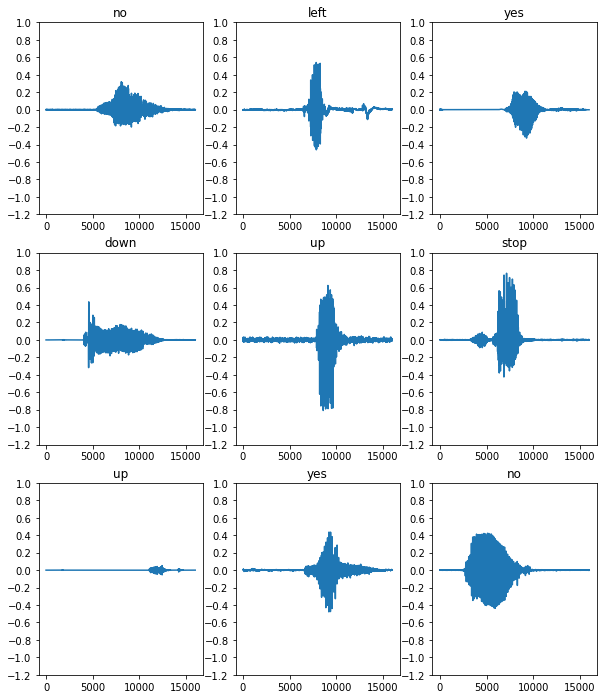

In [ ]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

## Convert waveforms to spectrograms

The waveforms in the dataset are represented in the time domain. Next, you'll transform the waveforms from the time-domain signals into the time-frequency-domain signals by computing the <a href="https://en.wikipedia.org/wiki/Short-time_Fourier_transform" class="external">short-time Fourier transform (STFT)</a> to convert the waveforms to as <a href="https://en.wikipedia.org/wiki/Spectrogram" clas="external">spectrograms</a>, which show frequency changes over time and can be represented as 2D images. You will feed the spectrogram images into your neural network to train the model.

A Fourier transform (`tf.signal.fft`) converts a signal to its component frequencies, but loses all time information. In comparison, STFT (`tf.signal.stft`) splits the signal into windows of time and runs a Fourier transform on each window, preserving some time information, and returning a 2D tensor that you can run standard convolutions on.

Create a utility function for converting waveforms to spectrograms:

- The waveforms need to be of the same length, so that when you convert them to spectrograms, the results have similar dimensions. This can be done by simply zero-padding the audio clips that are shorter than one second (using `tf.zeros`).
- When calling `tf.signal.stft`, choose the `frame_length` and `frame_step` parameters such that the generated spectrogram "image" is almost square. For more information on the STFT parameters choice, refer to <a href="https://www.coursera.org/lecture/audio-signal-processing/stft-2-tjEQe" class="external">this Coursera video</a> on audio signal processing and STFT.
- The STFT produces an array of complex numbers representing magnitude and phase. However, in this tutorial you'll only use the magnitude, which you can derive by applying `tf.abs` on the output of `tf.signal.stft`.

In [ ]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
  # Cast the waveform tensors' dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  # Concatenate the waveform with `zero_padding`, which ensures all audio
  # clips are of the same length.
  equal_length = tf.concat([waveform, zero_padding], 0)
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

Next, start exploring the data. Print the shapes of one example's tensorized waveform and the corresponding spectrogram, and play the original audio:

In [ ]:
waveform_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
list(waveform_ds.take(1).as_numpy_iterator())

[(array([ 0.00033569,  0.0015564 ,  0.00177002, ..., -0.00094604,
         -0.00091553, -0.00088501], dtype=float32), b'no')]

In [ ]:
for waveform, label in waveform_ds.take(10):
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

Label: right
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Now, define a function for displaying a spectrogram:

In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

Plot the example's waveform over time and the corresponding spectrogram (frequencies over time):

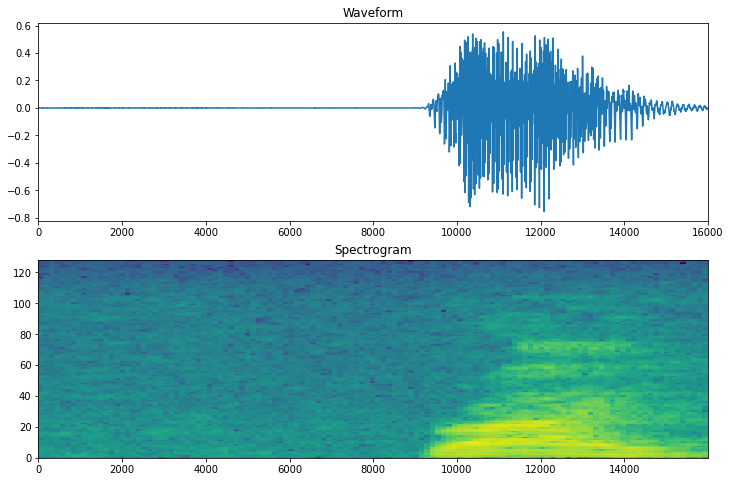

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

Now, define a function that transforms the waveform dataset into spectrograms and their corresponding labels as integer IDs:

In [ ]:
def get_spectrogram_and_label_id(audio, label):
  spectrogram = get_spectrogram(audio)
  label_id = tf.math.argmax(label == commands)
  return spectrogram, label_id

In [ ]:
a.map()

In [ ]:
get_spectrogram_and_label_id

Map `get_spectrogram_and_label_id` across the dataset's elements with `Dataset.map`:

In [ ]:
spectrogram_ds = waveform_ds.map(
  map_func=get_spectrogram_and_label_id,
  num_parallel_calls=AUTOTUNE)

Examine the spectrograms for different examples of the dataset:

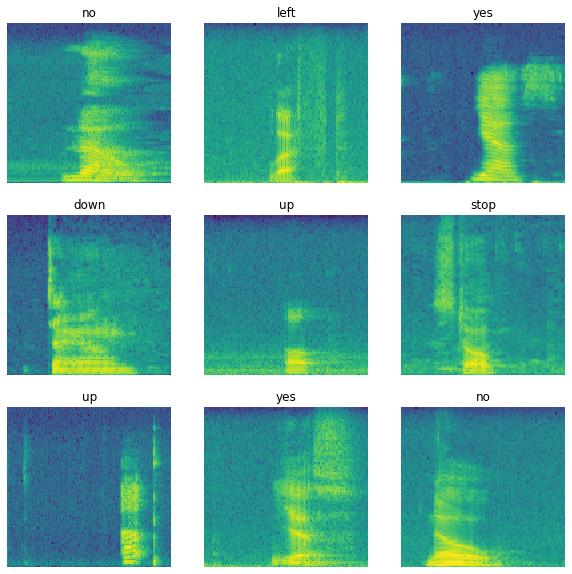

In [ ]:
rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  plot_spectrogram(spectrogram.numpy(), ax)
  ax.set_title(commands[label_id.numpy()])
  ax.axis('off')

plt.show()

## Build and train the model

Repeat the training set preprocessing on the validation and test sets:

In [ ]:
def preprocess_dataset(files):
  files_ds = tf.data.Dataset.from_tensor_slices(files)
  output_ds = files_ds.map(
      map_func=get_waveform_and_label,
      num_parallel_calls=AUTOTUNE)
  output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=AUTOTUNE)
  return output_ds

In [ ]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

# pred_ds = preprocess_dataset(pred_files)

Batch the training and validation sets for model training:

In [ ]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Add `Dataset.cache` and `Dataset.prefetch` operations to reduce read latency while training the model:

In [ ]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

For the model, you'll use a simple convolutional neural network (CNN), since you have transformed the audio files into spectrogram images.

Your `tf.keras.Sequential` model will use the following Keras preprocessing layers:

- `tf.keras.layers.Resizing`: to downsample the input to enable the model to train faster.
- `tf.keras.layers.Normalization`: to normalize each pixel in the image based on its mean and standard deviation.

For the `Normalization` layer, its `adapt` method would first need to be called on the training data in order to compute aggregate statistics (that is, the mean and the standard deviation).

In [ ]:
for spectrogram, _ in spectrogram_ds.take(1):
  input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           

Configure the Keras model with the Adam optimizer and the cross-entropy loss:

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

Train the model over 10 epochs for demonstration purposes:

In [ ]:
EPOCHS = 1
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

101/101 [==============================] - 25s 143ms/step - loss: 1.8100 - accuracy: 0.3411 - val_loss: 1.3708 - val_accuracy: 0.5655


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/model_saved/'

/content/drive/.shortcut-targets-by-id/19Bp04vWW0JoAv_H5AAW961ECIfvoY6re/Desktop_Based_AI_Secretary/강성현/model_saved


In [ ]:
# model.save('my_WUW_model.h5')

NameError: ignored

In [ ]:
# saved_path = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/model_saved/'
model = tf.keras.models.load_model('WUW.pb')

OSError: ignored

In [ ]:
save_path = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/model_saved/'
model.save_weights(save_path + 'WUW')

Let's plot the training and validation loss curves to check how your model has improved during training:

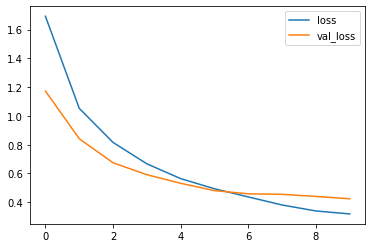

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

## Evaluate the model performance

Run the model on the test set and check the model's performance:

In [ ]:
test_audio = []
test_labels = []

for audio, label in test_ds:
  test_audio.append(audio.numpy())
  test_labels.append(label.numpy())


test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [ ]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 87%


### Display a confusion matrix

Use a <a href="https://developers.google.com/machine-learning/glossary#confusion-matrix" class="external">confusion matrix</a> to check how well the model did classifying each of the commands in the test set:


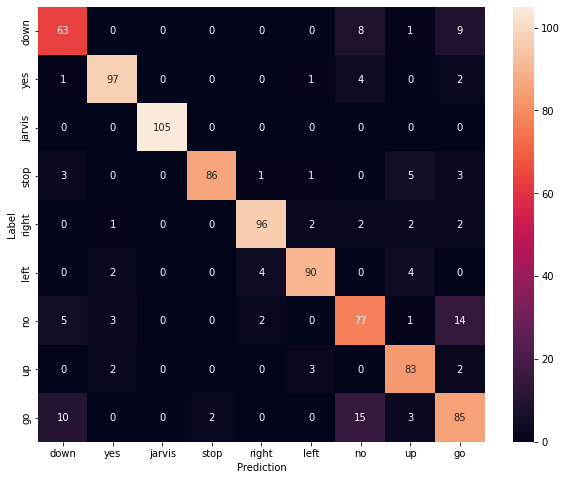

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

## Run inference on an audio file

Finally, verify the model's prediction output using an input audio file of someone saying "no". How well does your model perform?

In [ ]:
# /content/data/mini_speech_commands/
# /content/data/mini_speech_commands/
# sample_file = data_dir/'up/0135f3f2_nohash_1.wav'
# sample_file = data_dir/'go/0132a06d_nohash_2.wav'
sample_file = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/dataset/WUW dataset/민경태_3.wav'

# sample_ds = preprocess_dataset([str(sample_file)])
sample_ds = preprocess_dataset([str(sample_file)])

import time

start = time.time()
for spectrogram, label in sample_ds.batch(1):
  prediction = model(spectrogram)
#   plt.bar(commands, tf.nn.softmax(prediction[0]))
  print(max(tf.nn.softmax(prediction[0])).numpy())
#   plt.title(f'Predictions for "{commands[label[0]]}"')
  plt.show()

time.time() - start

0.82546985


0.17410826683044434

In [ ]:
for i in range(len(wuw_audio_list)):
    
    # sample_ds = preprocess_dataset([str(sample_file)])
    sample_ds = preprocess_dataset([str(wuw_audio_path + wuw_audio_list[i])])

    for spectrogram, label in sample_ds.batch(1):
        prediction = model(spectrogram)
        plt.bar(commands, tf.nn.softmax(prediction[0]))
        print(max(tf.nn.softmax(prediction[0])).numpy())
        #   plt.title(f'Predictions for "{commands[label[0]]}"')
        plt.show()

In [ ]:
commands[8]

'go'

In [ ]:
pred_audio = []

for audio, label in pred_ds:
  pred_audio.append(audio.numpy())

pred_audio = np.array(pred_audio)
y_pred = np.argmax(model.predict(pred_audio), axis=1)
print(y_pred)

[3 8 8 3 0 0 6 6 8 8 8 8]


# 예측할 오디오 로드 및 예측

In [ ]:
# final_test_audio_path = '/content/data/mini_speech_commands/stop' + '/'
final_test_audio_path = '/content/data/mini_speech_commands/jarvis' + '/'

# final_test_audio_path = '/content/drive/MyDrive/Desktop_Based_AI_Secretary/강성현/dataset/WUW dataset' + '/'

final_test_audio_list = sorted(os.listdir(final_test_audio_path))

for i in range(len(final_test_audio_list[0:12])):
    final_test_audio, sr = librosa.load(final_test_audio_path + final_test_audio_list[i], sr= 44100)

In [ ]:
final_test_files = []
for i in range(len(final_test_audio_list[0:12])):
    final_test_files.append(final_test_audio_path + final_test_audio_list[i])

final_test_files = tf.convert_to_tensor(final_test_files)
final_test_files_ds = preprocess_dataset(final_test_files)

In [ ]:
final_test_audio = []

for audio, label in final_test_files_ds:
  final_test_audio.append(audio.numpy())

final_test_audio = np.array(final_test_audio)
y_final_test = np.argmax(model.predict(final_test_audio), axis=1)
print(y_final_test)

[0 4 4 0 6 6 0 4 0 0 0 0]


In [ ]:
# [3 6 8 8 0 0 6 6 6 8 6 8]

label_dict = {}
for i in range(9):
    label_dict[0] = 'down'
    label_dict[1] = 'yes'
    label_dict[2] = 'jarvis' ###
    label_dict[3] = 'stop'
    label_dict[4] = 'right'
    label_dict[5] = 'left'
    label_dict[6] = 'no'
    label_dict[7] = 'up'
    label_dict[8] = 'go'
print(label_dict)

{0: 'down', 1: 'yes', 2: 'jarvis', 3: 'stop', 4: 'right', 5: 'left', 6: 'no', 7: 'up', 8: 'go'}


In [ ]:
for i in range(len(y_final_test)):
    print(label_dict[y_final_test[i]])

stop
no
go
go
down
down
no
no
no
go
no
go
